### Подключение библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [2]:
#df = pd.read_csv('archive/cost_of_living_index.csv')
#data = df.drop(['City', 'Cost of Living Index', 'Rent Index', 'Restaurant Price Index'], axis=1)

df = pd.read_csv('archive/pollution_index.csv')
data = df.drop(['City'], axis=1)
data.head()

,Pollution Index,Exp Pollution Index
0,43.65,72.77
1,92.70,167.07
2,78.69,138.70
3,19.00,30.42
4,72.61,127.22


In [3]:
df = pd.read_csv('covid/COVID-19 Coronavirus.csv')
df.Continent.replace({'Asia':0, 'Europe':1, 'Africa':2, 'Latin America and the Caribbean':3,'Oceania':4, 'Northern America':5}, inplace=True)
data = df
data = df.drop(['Continent', 'Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Total Cases', 'Total Deaths', 'Death percentage'], axis=1)
#data = df.drop(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE'], axis=1)

scaler = preprocessing.MinMaxScaler()

data[['Population', 'Tot Cases//1M pop', 'Tot Deaths/1M pop']] = scaler.fit_transform(data)
data.head()

,Population,Tot Cases//1M pop,Tot Deaths/1M pop
0,0.028111,0.006301,0.030226
1,0.001995,0.136976,0.193446
2,0.031429,0.008425,0.024181
3,0.000053,0.742141,0.314190
4,0.024076,0.004099,0.008750


### K-means

In [4]:
from sklearn.cluster import KMeans
models = []
score1 = []
score2 = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

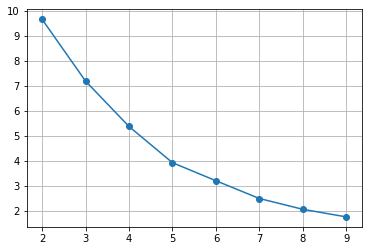

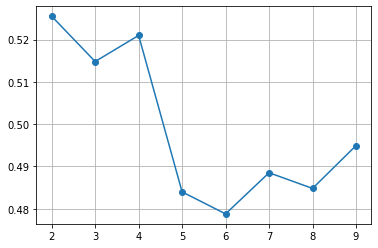

In [5]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker='o')
plt.show()

plt.grid()
plt.plot(np.arange(2, 10), score2, marker='o')
plt.show()

In [6]:
model1 = KMeans(n_clusters=4, random_state=123, init='k-means++')
model1.fit(data)
labels = model1.labels_
data['Cluster'] = labels
print(data['Cluster'].value_counts())
model1.cluster_centers_

0    127
1     49
2     47
3      2
Name: Cluster, dtype: int64


array([[0.01693037, 0.06166879, 0.05325545],
       [0.02211374, 0.22899558, 0.40015714],
       [0.00582175, 0.53520346, 0.27287251],
       [0.98764371, 0.02208438, 0.02974865]])

In [7]:
fig = go.Figure(data=[go.Scatter3d(x=data['Population'], y=data['Tot Cases//1M pop'], z=data['Tot Deaths/1M pop'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])
fig.show()

### Иерархическая агломеративная кластеризация

In [8]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(6, compute_distances=True)
data.drop('Cluster', axis=1, inplace=True)
agglo = model2.fit(data)
data['Cluster'] = agglo.labels_

In [9]:
fig = go.Figure(data=[go.Scatter3d(x=data['Population'], y=data['Tot Cases//1M pop'], z=data['Tot Deaths/1M pop'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])
fig.show()

### DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
data.drop('Cluster', axis=1, inplace=True)
model3 = DBSCAN(eps=11, min_samples=5).fit(data)
data['Cluster'] = model3.labels_

In [11]:
fig = go.Figure(data=[go.Scatter3d(x=data['Population'], y=data['Tot Cases//1M pop'], z=data['Tot Deaths/1M pop'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])
fig.show()